In [ ]:
# Analyzing metrics results for output from 3 RAG Evaluation Libraries: RAGAS, DeepEval, and ARES
# Generated metric results with 2 different LLMs: Gemini 1.5 Flash and Gemini 2.0 Experimental
# Dataset: Documents and the first 903 Queries from datasets/rag_mini_wikipedia_complete_chat.csv, from HuggingFace
# https://huggingface.co/datasets/rag-datasets/rag-mini-wikipedia
# Answers and contexts generated by Gemini 1.5 Flash with a local RAG setup using Faiss

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
# ARES results - there is no example-level output from ARES, just the results from ues_idp
ares15 = pd.DataFrame([[0.692, 0.711]], columns=['Faithfulness', 'Contextual_Precision'])
ares2 = pd.DataFrame([[0.792, 0.852]], columns=['Faithfulness', 'Contextual_Precision'])
ares = pd.concat([ares15, ares2])
ares.index = [15, 2]

In [3]:
ares

,Faithfulness,Contextual_Precision
15,0.692,0.711
2,0.792,0.852


In [4]:
# Difference between scores for llms with ARES
abs(ares.loc[15] - ares.loc[2])

Faithfulness            0.100
Contextual_Precision    0.141
dtype: float64

In [5]:
# Comparison of deepeval results across the Gemini 1.5 and Gemini 2.0 Experimental LLMs
# Want to see how consistent metric results are across LLMs
# Overall results: 
# Faithfulness Gemini 1.5 : 0.958
# Faithfulness Gemini 2.0 : 0.967882
dp_15_faithfulness = pd.read_csv("results/deepeval_faithfulness_gemini_15_rag_mini_wikipedia_903.csv", index_col=None)
dp_2_faithfulness = pd.read_csv("results/deepeval_faithfulness_gemini_2_rag_mini_wikipedia_903.csv", index_col=None)
dp_2_contextprecision = pd.read_csv("results/deepeval_cp_gemini_2_rag_mini_wikipedia_903.csv", index_col=None)
dp_15_contextprecision = pd.read_csv("results/deepeval_contextprecision_gemini_15_rag_mini_wikipedia_903.csv", index_col=None)

In [6]:
dp_15_faithfulness.columns = ['DeepEval_Faithfulness_15']
dp_2_faithfulness.columns = ['DeepEval_Faithfulness_2']
dp_15_contextprecision.columns = ['DeepEval_ContextualPrecision_15']
dp_2_contextprecision.columns = ['DeepEval_ContextualPrecision_2']

In [7]:
dp_avg = pd.DataFrame([[dp_15_faithfulness.mean().iloc[0], dp_15_contextprecision.mean().iloc[0]], [dp_2_faithfulness.mean().iloc[0], dp_2_contextprecision.mean().iloc[0]]], columns=['Faithfulness', 'Contextual_Precision'])
dp_avg.index = [15,2]
dp_avg

,Faithfulness,Contextual_Precision
15,0.958000,0.792454
2,0.967882,0.756079


In [8]:
# Difference between scores for llms with DeepEval
abs(dp_avg.loc[15] - dp_avg.loc[2])

Faithfulness            0.009882
Contextual_Precision    0.036374
dtype: float64

In [9]:
dpllm_results = pd.concat([dp_15_faithfulness, dp_2_faithfulness, dp_15_contextprecision, dp_2_contextprecision], axis=1, ignore_index=False)

In [10]:
dpllm_results

,DeepEval_Faithfulness_15,DeepEval_Faithfulness_2,DeepEval_ContextualPrecision_15,DeepEval_ContextualPrecision_2
0,1.0,1.0,1.0,1.000000
1,1.0,1.0,1.0,1.000000
2,1.0,1.0,0.0,0.000000
3,1.0,1.0,1.0,1.000000
4,1.0,1.0,1.0,1.000000
...,...,...,...,...
898,1.0,1.0,1.0,0.700000
899,1.0,1.0,1.0,1.000000
900,1.0,1.0,1.0,1.000000
901,1.0,1.0,0.7,0.809524


In [11]:
# DeepEval Faithfulness metric analysis
# lets see how far apart the average result was
# 821/903 rows were within 0.1 score of each other (90.9%)
# 832/903 rows were within 0.2 score of each other (92.1%)
# 840/903 rows were within 0.3 score of each other, (93.0%)
# so 63/903 were > 0.3 score of each other (7%)
# average difference between results was 0.05356... so results seem fairly close together across LLMs
# np.mean(abs(dpllm_results['DeepEval_Faithfulness_15'] - dpllm_results['DeepEval_Faithfulness_2']))
dpllm_results[abs(dpllm_results['DeepEval_Faithfulness_15'] - dpllm_results['DeepEval_Faithfulness_2']) > 0.3].count()

DeepEval_Faithfulness_15           63
DeepEval_Faithfulness_2            63
DeepEval_ContextualPrecision_15    63
DeepEval_ContextualPrecision_2     63
dtype: int64

In [12]:
# Contextual Precision analysis
# lets see how far apart the average result was
# 598/903 rows were within 0.1 score of each other (66.2%)
# 679/903 rows were within 0.2 score of each other (75.2%)
# 728/903 rows were within 0.3 score of each other, (80.6%)
# so 175/903 were > 0.3 score of each other (19.4%)
# average difference between results was 0.1452.... so results did vary across the LLMs on an example by example basis
# np.mean(abs(dpllm_results['DeepEval_ContextualPrecision_15'] - dpllm_results['DeepEval_ContextualPrecision_2']))
dpllm_results[abs(dpllm_results['DeepEval_ContextualPrecision_15'] - dpllm_results['DeepEval_ContextualPrecision_2']) <= 0.1].count()

DeepEval_Faithfulness_15           598
DeepEval_Faithfulness_2            598
DeepEval_ContextualPrecision_15    598
DeepEval_ContextualPrecision_2     598
dtype: int64

<Axes: ylabel='Frequency'>

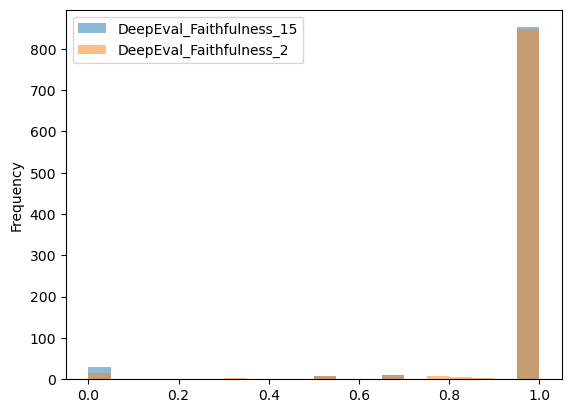

In [13]:
# faithfulness scores tended to be either 0 or 1 and stayed pretty consistent across LLMs
dpllm_results.plot.hist(column=['DeepEval_Faithfulness_15', 'DeepEval_Faithfulness_2'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

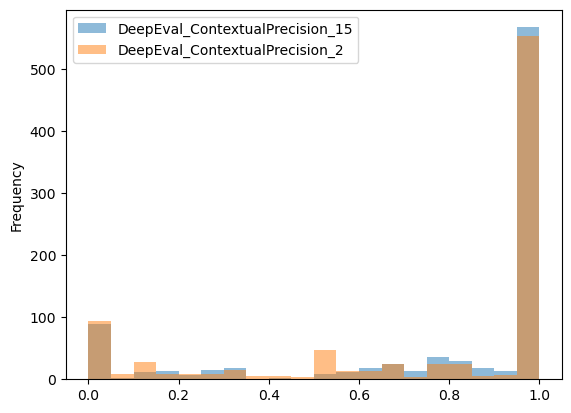

In [14]:
# contextual precision scores varied more but still seemed to overlap across LLMs; 
# Of course, this isn't showing the example vs example view
dpllm_results.plot.hist(column=['DeepEval_ContextualPrecision_15', 'DeepEval_ContextualPrecision_2'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

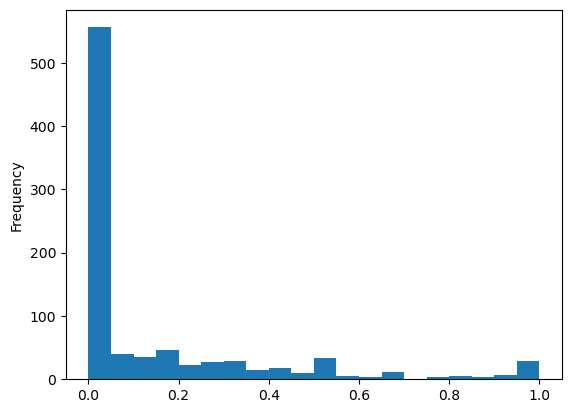

In [15]:
# Histogram plot of the differences between individual DeepEval Context Precision scores when only the judge LLM varies
abs(dpllm_results['DeepEval_ContextualPrecision_15'] - dpllm_results['DeepEval_ContextualPrecision_2']).plot.hist(bins=20)

<Axes: ylabel='Frequency'>

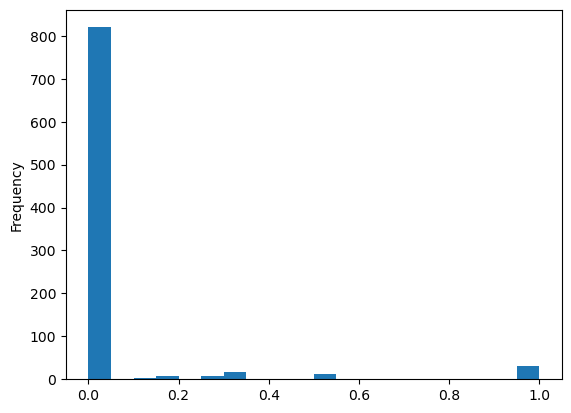

In [16]:
# Histogram plot of the differences between individual DeepEval Faithfulness scores when only the judge LLM varies
abs(dpllm_results['DeepEval_Faithfulness_15'] - dpllm_results['DeepEval_Faithfulness_2']).plot.hist(bins=20)

In [17]:
# RAGAS metrics results analysis
ragas_15_contextprecision = pd.read_csv("results/results_ragas_gemini_15_rag_mini_wiki_complete_chat_903_context_precision.csv", index_col=None)
ragas_2_contextprecision = pd.read_csv("results/results_ragas_gemini_2_rag_mini_wiki_complete_chat_contextprecision_903.csv", index_col=None)
ragas_15_faithfulness = pd.read_csv("results/results_ragas_gemini_15_rag_mini_wiki_complete_chat_faithfulness_903.csv", index_col=None)
ragas_2_faithfulness = pd.read_csv("results/results_ragas_gemini_2_rag_mini_wiki_complete_chat_faithfulness_903.csv", index_col=None)

In [18]:
ragas_2_contextprecision['context_precision'].mean()

np.float64(0.7723373673848569)

In [19]:
# averages across ragas metrics 
ragas_avg = pd.DataFrame([[ragas_15_faithfulness['faithfulness'].mean(), ragas_15_contextprecision['context_precision'].mean()], [ragas_2_faithfulness['faithfulness'].mean(), ragas_2_contextprecision['context_precision'].mean()]],  columns=['Faithfulness', 'Contextual_Precision'])
ragas_avg.index = [15, 2]
ragas_avg

,Faithfulness,Contextual_Precision
15,0.866768,0.771484
2,0.888798,0.772337


In [20]:
# Difference between scores for llms with RAGAS , so almost the same
abs(ragas_avg.loc[15] - ragas_avg.loc[2])

Faithfulness            0.022030
Contextual_Precision    0.000854
dtype: float64

In [21]:
ragasllm_results = pd.concat([ragas_15_faithfulness['faithfulness'], ragas_2_faithfulness['faithfulness'], ragas_15_contextprecision['context_precision'], ragas_2_contextprecision['context_precision']], axis=1, ignore_index=False)
ragasllm_results.columns = ['RAGAS_Faithfulness_15', 'RAGAS_Faithfulness_2', 'RAGAS_ContextualPrecision_15', 'RAGAS_ContextualPrecision_2']

In [22]:
ragasllm_results

,RAGAS_Faithfulness_15,RAGAS_Faithfulness_2,RAGAS_ContextualPrecision_15,RAGAS_ContextualPrecision_2
0,1.000000,1.0,1.000000,0.766667
1,1.000000,1.0,1.000000,1.000000
2,0.500000,0.5,0.240741,0.211111
3,1.000000,1.0,1.000000,1.000000
4,1.000000,1.0,1.000000,1.000000
...,...,...,...,...
898,1.000000,1.0,1.000000,1.000000
899,0.714286,1.0,0.700000,0.700000
900,1.000000,1.0,1.000000,1.000000
901,0.500000,1.0,0.416667,0.833333


In [23]:
# Both of the Faithfulness metric results for RAGAS contain 4 rows of nan; Contextual Precision results are complete
np.isnan(ragasllm_results['RAGAS_Faithfulness_2']).sum()

np.int64(4)

In [24]:
# RAGAS Faithfulness metric analysis
# lets see how far apart the average result was
# 728/899 rows were within 0.1 score of each other (81%)
# 757/899 rows were within 0.2 score of each other (84.2%)
# 788/899 rows were within 0.3 score of each other, (87.7%)
# so 111/899 were > 0.3 score of each other (12.3%)
# average difference between results was 0.0772... so results did vary example by example a decent amount
np.mean(abs(ragasllm_results['RAGAS_Faithfulness_15'] - ragasllm_results['RAGAS_Faithfulness_2']))
#ragasllm_results[abs(ragasllm_results['RAGAS_Faithfulness_15'] - ragasllm_results['RAGAS_Faithfulness_2']) > 0.3].count()

np.float64(0.0772489788295534)

<Axes: ylabel='Frequency'>

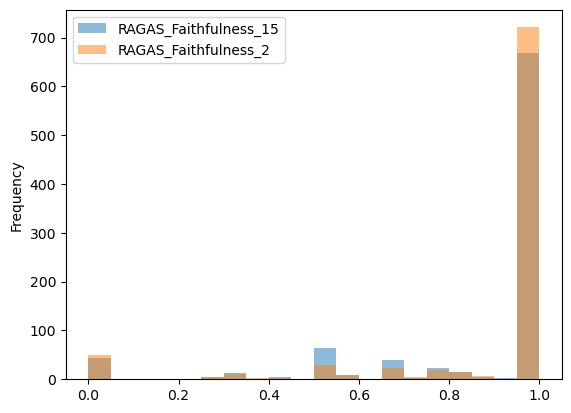

In [25]:
# Faithfulness scores were overwhelmingly 1; 
# otherwise there was a decent overlap across the llms but definitely some distinctions with scores around 0.5-0.7
# This doesn't show an exact example-to-example comparison
ragasllm_results.plot.hist(column=['RAGAS_Faithfulness_15', 'RAGAS_Faithfulness_2'], bins=20, alpha=0.5)

In [26]:
# RAGAS Contextual Precision metric analysis
# lets see how far apart the average result was
# 716/903 rows were within 0.1 score of each other (79.29%)
# 789/903 rows were within 0.2 score of each other (87.37%)
# 836/903 rows were within 0.3 score of each other, (92.58%)
# so 67/903 were > 0.3 score of each other (7.42%)
# average difference between results was 0.069, so results varied example by example by a decent amount
len(ragasllm_results[abs(ragasllm_results['RAGAS_ContextualPrecision_15'] - ragasllm_results['RAGAS_ContextualPrecision_2']) > 0.3])

67

<Axes: ylabel='Frequency'>

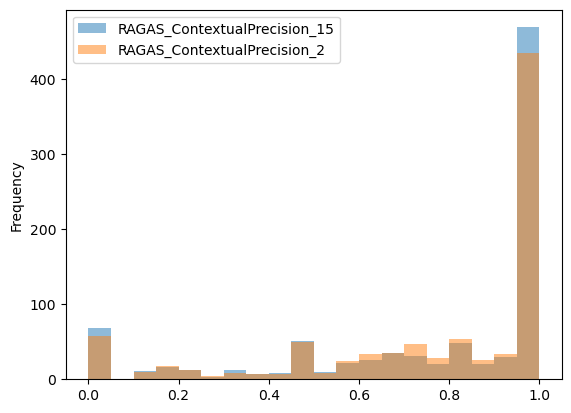

In [27]:
# This doesn't show an exact example-to-example comparison
# but on average, scores did tend to overlap, with most Contextual Precision scores overwhelmingly being 1
ragasllm_results.plot.hist(column=['RAGAS_ContextualPrecision_15', 'RAGAS_ContextualPrecision_2'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

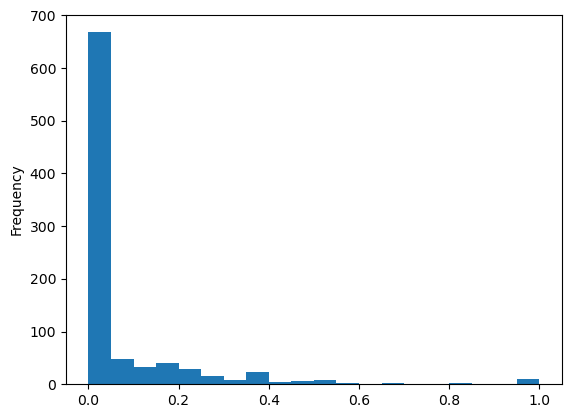

In [28]:
# Histogram plot of the differences between individual RAGAS Context Precision scores when only the judge LLM varies
abs(ragasllm_results['RAGAS_ContextualPrecision_15'] - ragasllm_results['RAGAS_ContextualPrecision_2']).plot.hist(bins=20)

<Axes: ylabel='Frequency'>

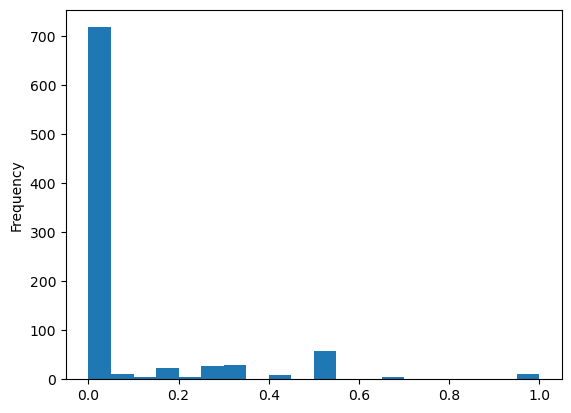

In [29]:
# Histogram plot of the differences between individual RAGAS Faithfulness scores when only the judge LLM varies
abs(ragasllm_results['RAGAS_Faithfulness_15'] - ragasllm_results['RAGAS_Faithfulness_2']).plot.hist(bins=20)

In [33]:
# Comparison across libraries

In [34]:
# Difference between ARES and DeepEval ; pretty significant for faithfulness, still a big change for contextual precision
abs(ares - dp_avg)

,Faithfulness,Contextual_Precision
15,0.266000,0.081454
2,0.175882,0.095921


In [35]:
# Difference between RAGAS and DeepEval 
abs(ragas_avg - dp_avg)

,Faithfulness,Contextual_Precision
15,0.091232,0.020970
2,0.079084,0.016258


In [36]:
# Difference between RAGAS and ARES 
abs(ragas_avg - ares)

,Faithfulness,Contextual_Precision
15,0.174768,0.060484
2,0.096798,0.079663


In [37]:
# Overlay of DeepEval and RAGAS context precision scores
ragas_dp_results = pd.concat([ragasllm_results, dpllm_results], axis=1)

<Axes: ylabel='Frequency'>

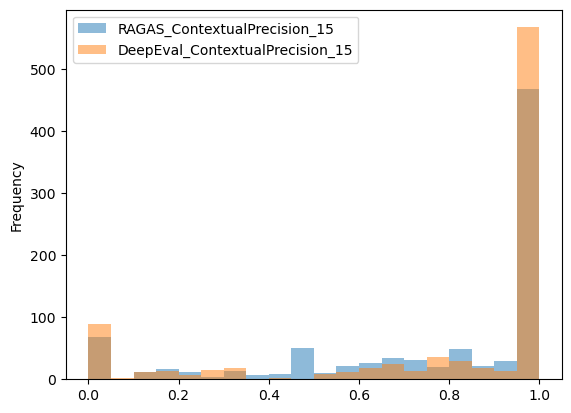

In [38]:
ragas_dp_results.plot.hist(column=['RAGAS_ContextualPrecision_15', 'DeepEval_ContextualPrecision_15'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

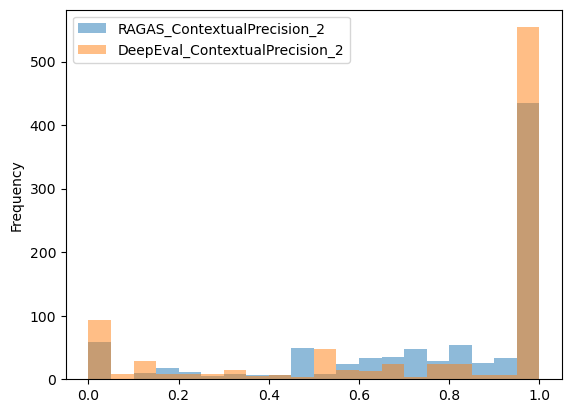

In [39]:
ragas_dp_results.plot.hist(column=['RAGAS_ContextualPrecision_2', 'DeepEval_ContextualPrecision_2'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

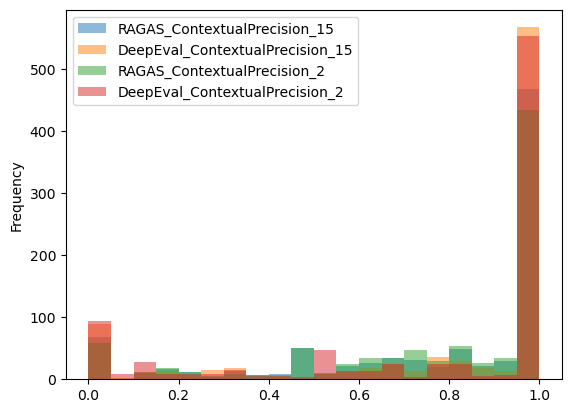

In [40]:
# All Contextual Precision Results
ragas_dp_results.plot.hist(column=['RAGAS_ContextualPrecision_15', 'DeepEval_ContextualPrecision_15', 'RAGAS_ContextualPrecision_2', 'DeepEval_ContextualPrecision_2'], bins=20, alpha=0.5)

In [41]:
# Comparison of DeepEval and RAGAS faithfulness scores

<Axes: ylabel='Frequency'>

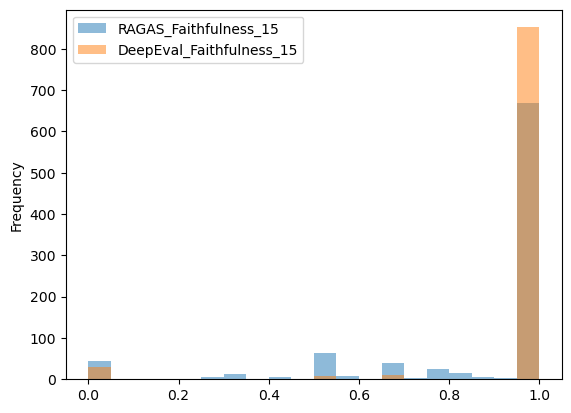

In [42]:
ragas_dp_results.plot.hist(column=['RAGAS_Faithfulness_15', 'DeepEval_Faithfulness_15'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

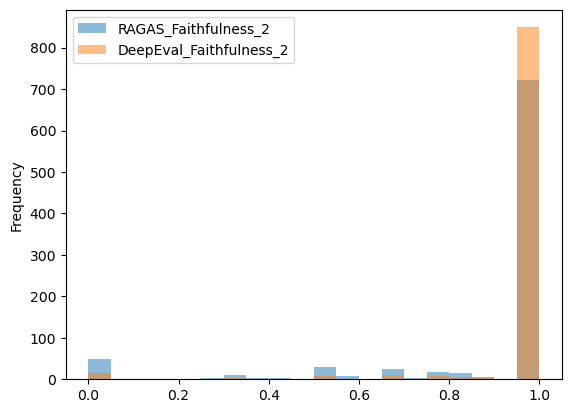

In [43]:
ragas_dp_results.plot.hist(column=['RAGAS_Faithfulness_2', 'DeepEval_Faithfulness_2'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

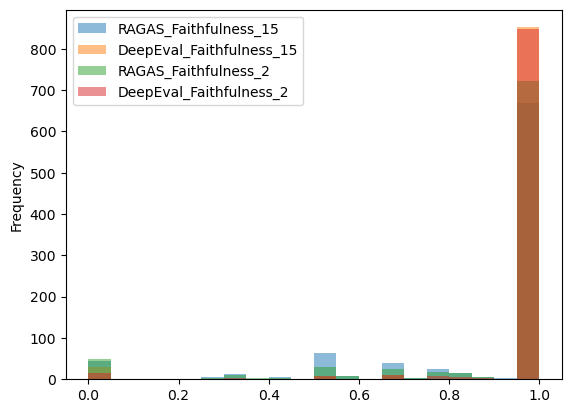

In [44]:
# Much less variance for Faithfulness score distribution as opposed to Contextual Precision
ragas_dp_results.plot.hist(column=['RAGAS_Faithfulness_15', 'DeepEval_Faithfulness_15', 'RAGAS_Faithfulness_2', 'DeepEval_Faithfulness_2'], bins=20, alpha=0.5)

In [45]:
# Observation from graphs, proven below: DeepEval tends to label more examples as 1.0 vs RAGAS

In [46]:
(ragas_dp_results['DeepEval_ContextualPrecision_15'] >= 0.99).sum() - (ragas_dp_results['RAGAS_ContextualPrecision_15'] >= 0.99).sum()

np.int64(102)

In [47]:
(ragas_dp_results['DeepEval_ContextualPrecision_2'] >= 0.99).sum() - (ragas_dp_results['RAGAS_ContextualPrecision_2'] >= 0.99).sum()

np.int64(123)

In [48]:
(ragas_dp_results['DeepEval_Faithfulness_15'] >= 0.99).sum() - (ragas_dp_results['RAGAS_Faithfulness_15'] >= 0.99).sum()

np.int64(184)

In [49]:
(ragas_dp_results['DeepEval_Faithfulness_2'] >= 0.99).sum() - (ragas_dp_results['RAGAS_Faithfulness_2'] >= 0.99).sum()

np.int64(128)

In [6]:
# 2/6 comparison of results from deepeval v2.2.7 vs v1.1.6
# Just the first 100 examples
dp_116 = pd.read_csv("results/deepeval_contextprecision_gemini_15_rag_mini_wikipedia_903.csv")
dp_116 = dp_116[:100]

In [8]:
dp_116.mean()

0    0.796861
dtype: float64

In [50]:
# Next ToDo: compare example by example results for variation
# 2/6 comparison of results from RAGAS v0.2.12 vs v0.1.15
# Just the first 100 examples
ragas_115 = pd.read_csv("results/results_ragas_gemini_15_rag_mini_wiki_complete_chat_903_context_precision.csv")
ragas_212 = pd.read_csv("results/results_ragas_2_12_gemini_1_5_rag_mini_wiki_complete_chat_cpnoref_0_100.csv")
ragas_212_ref = pd.read_csv("results/results_ragas_2_12_gemini_1_5_rag_mini_wiki_complete_chat_cpwithref_0_100.csv")
ragas_115 = ragas_115[:100]

In [51]:
ragas_115['context_precision'].mean()

np.float64(0.7470385581525725)

In [52]:
ragas_212['llm_context_precision_without_reference'].mean()

np.float64(0.7118638888402334)

In [58]:
ragas_212_ref['llm_context_precision_with_reference'].mean() # There is one row of NA that had json return errors, even with multiple retries

np.float64(0.7454862780785527)

In [61]:
# Compare results example-by-example for variations in prediction
ragas_updates = pd.concat([ragas_115, ragas_212, ragas_212_ref], ignore_index=True, axis=1)

In [81]:
# 64 rows have a score difference of < 0.01 ; 71 rows are <= 0.1; 85 rows are <= 0.2; 90 rows are <= 0.3
sum(abs(ragas_updates[4] - ragas_updates[8]) <= 0.3)

90

<Axes: ylabel='Frequency'>

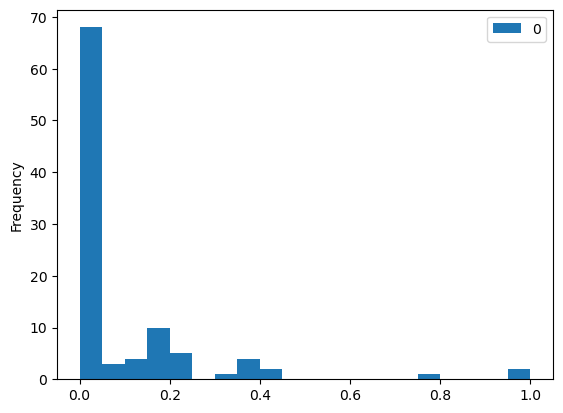

In [85]:
# My takeaway: there's definitely some variation, but this roughly matches the RAGAS plot from switching LLMs as well
# so this may be naturally occuring variation from an LLM in general
# Would need to repeat multiple trials to discover which is the case
pd.DataFrame(abs(ragas_updates[4] - ragas_updates[8])).plot.hist(bins=20)

In [97]:
# Is there a difference in reference vs non-reference calls?
# 60 rows have a score difference of <= 0.01, 71 rows are <= 0.1, 83 are <= 0.2, 87 are <= 0.3
sum(abs(ragas_updates[8] - ragas_updates[13]) <= 0.01)

60

<Axes: ylabel='Frequency'>

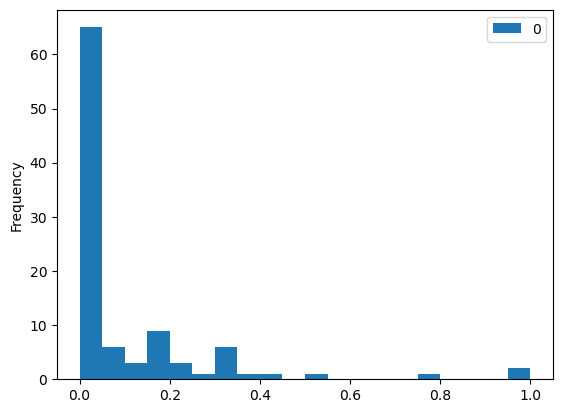

In [98]:
# My takeaway: again, there's some differences, but given that this distribution matches the library update distribution
# and the LLM change distribution, my guess is these are naturally occuring differences from using an LLM
pd.DataFrame(abs(ragas_updates[8] - ragas_updates[13])).plot.hist(bins=20)

In [ ]:
sum(abs(ragas_updates[4] - ragas_updates[8]) <= 0.3)

In [2]:
# 12/11 comparison of results from deepeval and ragas
# This was using a dataset synthetically generated by deepeval; not the huggingface neutral dataset
# Just comparing Contextual Precision metric with Gemini 1.5 LLM
deepeval_results = pd.read_csv("results/deepeval_contextprecision_unlabeled.csv", index_col=None)
ragas_results = pd.read_csv("results/results_ragas_unlabeled_all.csv", index_col=None)

In [3]:
results = pd.concat([ragas_results, deepeval_results], axis=1, ignore_index=False)

In [4]:
results = results.rename(columns={'context_precision': 'ragas_cp', 'score':'deepeval_cp'})

In [6]:
# 169/800 rows were within 0.1 score of each other
# 234/800 rows were within 0.2 score of each other
# 278/800 rows were within 0.3 score of each other, 
# so 522/800 were > 0.3 score of each other
# average difference between results was 0.5409... this tells me they were really far apart, given a restricted scoring range of 0-1
np.mean(abs(results['ragas_cp'] - results['deepeval_cp']))

0.540941989035695

<Axes: ylabel='Frequency'>

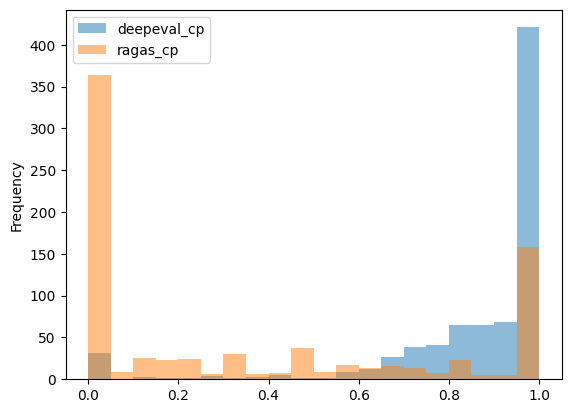

In [7]:
results.plot.hist(column=['deepeval_cp', 'ragas_cp'], bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

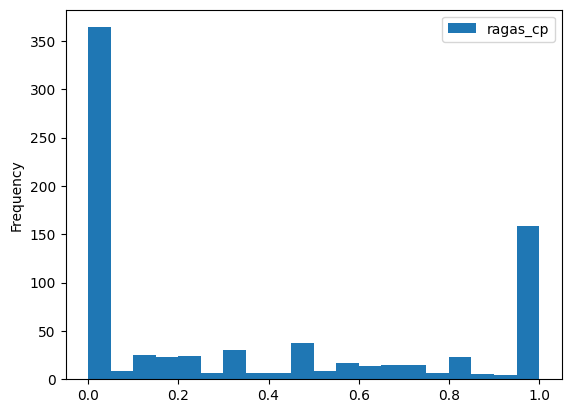

In [8]:
results.plot.hist(column=['ragas_cp'], bins=20)

In [9]:
results.to_csv("results/ragas_and_deepeval_unlabeled_results.csv", index=False)

In [ ]:
# for my manual comparison review of results (above)
import random
for i in range(0,15):
    print(random.randint(2, 801))

# 109
# 154
# 400
# 163
# 741
# 704
# 126
# 167
# 724
# 18
# 379
# 51
# 514
# 556
# 586

In [18]:
data = pd.read_csv("results/results_ragas_gemini_2_rag_mini_wiki_complete_chat_contextprecision_903.csv", index_col=None)

In [19]:
data

,question,ground_truth,contexts,answer,context_precision
0,Was Abraham Lincoln the sixteenth President of...,yes,"['Abraham Lincoln (February 12, 1809 â\x80\x93...","Yes, Abraham Lincoln was the sixteenth Preside...",0.766667
1,Did Lincoln sign the National Banking Act of 1...,yes,"[""Lincoln believed in the Whig theory of the p...","Yes, the provided text states that Lincoln sig...",1.000000
2,Did his mother die of pneumonia?,no,"['Soon thereafter, Tesla hastened from Paris t...",The provided text doesn't contain information ...,0.211111
3,How many long was Lincoln's formal education?,18 months,"[""Lincoln's formal education consisted of abou...",The text states that Lincoln's formal educatio...,1.000000
4,When did Lincoln begin his political career?,1832,"['Lincoln began his political career in 1832, ...","Lincoln began his political career in 1832, at...",1.000000
...,...,...,...,...,...
898,Was Wilson a member of the Phi Kappa Psi frate...,yes,['* Wilson was a member of the Phi Kappa Psi f...,"Yes, Woodrow Wilson was a member of the Phi Ka...",1.000000
899,Was Wilson an automobile enthusiast?,yes,"[""Wilson's Pierce Arrow, which resides in his ...",While not an *avid* enthusiast in the sense of...,0.700000
900,Did Wilson's father own slaves?,yes,"[""Thomas Woodrow Wilson was born in Staunton, ...","Yes, Woodrow Wilson's father, Joseph Ruggles W...",1.000000
901,Where is Wilson buried?,He was buried in Washington National Cathedral,['* Wilson is the only U.S. President buried i...,Woodrow Wilson is buried in Washington Nationa...,0.833333
